In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [64]:
G = nx.gnp_random_graph(100, 0.5, directed=False)

In [65]:
degrees = []
for node in G.nodes:
    degrees.append(G.degree(node))

In [66]:
fit_params = stats.powerlaw.fit(degrees)
print(fit_params)

(0.6138603340228637, 40.99999999999999, 21.00000000000001)


(array([0.03428571, 0.01714286, 0.06428571, 0.10285714, 0.06857143,
        0.07285714, 0.04714286, 0.01714286, 0.00428571]),
 array([41.        , 43.33333333, 45.66666667, 48.        , 50.33333333,
        52.66666667, 55.        , 57.33333333, 59.66666667, 62.        ]),
 [<matplotlib.patches.Polygon at 0x739bafd39570>])

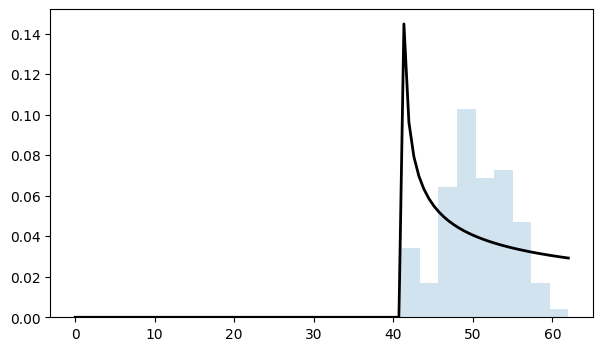

In [73]:
plt.figure(figsize=(7,4))
x = np.linspace(0, max(degrees), 100)
pdff = stats.powerlaw.pdf(x, *fit_params)
plt.plot(x, pdff, 'k-', lw=2, label='Power law fit')
plt.hist(degrees, bins='auto', histtype='stepfilled', density=True, alpha=0.2, label='Degree distribution')

In [113]:
def kld(p,q):
    assert len(p) == len(q)
    # assume they are defined on the same sample space
    kl = 0
    for ii in range(len(p)):
        if p[ii] > 0 and q[ii] > 0:
            kl += p[ii] * np.log(p[ii]/q[ii])
    return kl

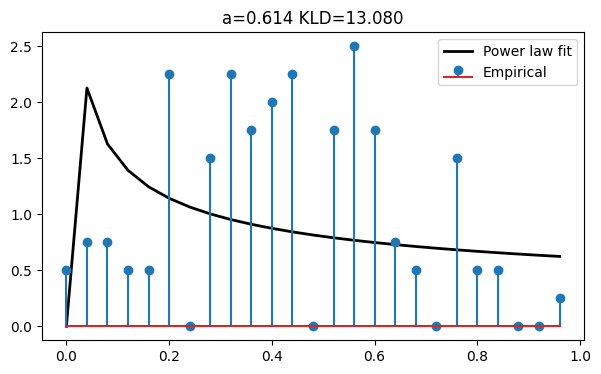

In [115]:
degrees_normalized = (degrees - fit_params[1]) / fit_params[2]
hist, bins = np.histogram(degrees_normalized, 
                          bins=25, range=(0, np.max(degrees_normalized)), density=True)
bins = bins[0:-1]
# shifted
plt.figure(figsize=(7,4))
x = bins
pdff = stats.powerlaw.pdf(x, fit_params[0])
kl = kld(hist, pdff)
plt.plot(x, pdff, 'k-', lw=2, label='Power law fit')
plt.stem(bins, hist, label='Empirical')
plt.title('a=%0.03f KLD=%0.03f' % (fit_params[0], kl))
plt.legend()

In [90]:
min(degrees_normalized)

3.3835368369528564e-16

In [92]:
stats.powerlaw.pdf(min(degrees_normalized), fit_params[0])

577953.7966291292

In [102]:
np.log(0)

/tmp/ipykernel_131675/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf